In [1]:
#1.Import dataset and display first 5 rows
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
print(df.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [2]:
#2.check column datatypes
print(df.dtypes);

TV       float64
Sales    float64
dtype: object


In [3]:
#3.shape of the dataframe[no of rows and columns]
print(df.shape[0]);
print(df.shape[1]);

200
2


In [4]:
#4.look at summay statistics
print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


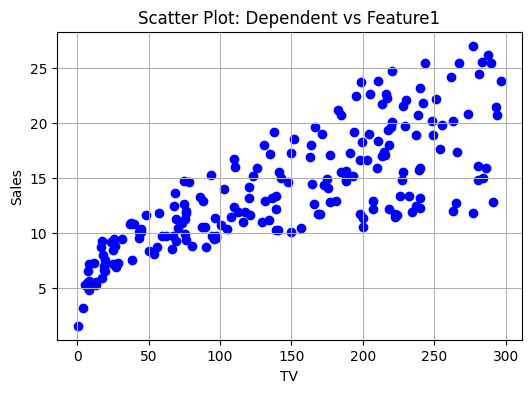

In [5]:
#5.relationship between features and dependent variables using scatterl=plots
# Scatter plot between Dependent and Feature1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(6, 4))
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.title('Scatter Plot: Dependent vs Feature1')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [6]:
#6. Prepare X (feature variables) and y (response variable)
from sklearn.model_selection import train_test_split
x=df[['TV']]
y=df['Sales']
print(x)
print(y)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [7]:
#7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,
#y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


        TV
55   198.9
25   262.9
46    89.7
4    180.8
52   216.4
..     ...
197  177.0
85   193.2
112  175.7
48   227.2
113  209.6

[140 rows x 1 columns]
        TV
101  296.4
157  149.8
42   293.6
187  191.1
61   261.3
30   292.9
26   142.9
39   228.0
189   18.7
102  280.2
184  253.8
145  140.3
135   48.3
142  220.5
110  225.8
22    13.2
156   93.9
84   213.5
124  229.5
19   147.3
116  139.2
58   210.8
122  224.0
106   25.0
185  205.0
29    70.6
38    43.1
44    25.1
141  193.7
17   281.4
93   250.9
114   78.2
77   120.5
34    95.7
161   85.7
121   18.8
16    67.8
6     57.5
70   199.1
13    97.5
47   239.9
130    0.7
100  222.4
73   129.4
81   239.8
10    66.1
94   107.4
188  286.0
190   39.5
167  206.8
5      8.7
198  283.6
87   110.7
97   184.9
56     7.3
186  139.5
150  280.7
117   76.4
118  125.7
20   218.4
55     23.7
25     12.0
46     10.6
4      12.9
52     22.6
       ... 
197    12.8
85     15.2
112    14.1
48     14.8
113    15.9
Name: Sales, Length: 140, dtype: float64


In [8]:
#8.print shape of the train data and test data
print(x_train.shape);
print(x_test.shape);
print(y_train.shape);
print(y_test.shape);


(140, 1)
(60, 1)
(140,)
(60,)


In [9]:
#9. Perform Linear Regression (on train data) without using any library and  print coefficent values
import numpy as np
x_train_np=x_train.values.flatten()
y_train_np=y_train.values
mean_x=np.mean(x_train_np)
mean_y=np.mean(y_train_np)
numerator=np.sum((x_train_np-mean_x)*(y_train_np-mean_y))
denominator=np.sum((x_train_np-mean_x)**2)
b1=numerator/denominator
b0=mean_y-b1*mean_x
print("linear regreesion ");
print("intersept(b0):",b0);
print("Slope",b1);

linear regreesion 
intersept(b0): 7.172963777100758
Slope 0.04620298313234478


In [10]:
#10..Create the model using the calculated coefficients and make predictions on the testing set
#formula for minimizing error 
X_test_np = x_test.values.flatten()
y_pred_manual = b0 + b1 * X_test_np

print("\nManual Predictions on Testing Set:")
print(y_pred_manual[:5])  # display first 5 predictions



Manual Predictions on Testing Set:
[20.86752798 14.09417065 20.73815962 16.00235385 19.24580327]


In [11]:
#11..Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression

# Create and train the model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [12]:

#.12.Print the intercept and coefficients
print("\nscikit-learn Linear Regression Coefficients:")
print("Intercept: b0", lr.intercept_)
print("Coefficient for TV: slope b1", lr.coef_[0])



scikit-learn Linear Regression Coefficients:
Intercept: b0 7.1729637771007555
Coefficient for TV: slope b1 0.0462029831323448


In [13]:
#13.Make predictions on the testing set - y_pred
#y=b0​+b1​⋅x
y_pred = lr.predict(x_test)
print("\nscikit-learn Predictions on Testing Set:")
print(y_pred[:5])


scikit-learn Predictions on Testing Set:
[20.86752798 14.09417065 20.73815962 16.00235385 19.24580327]


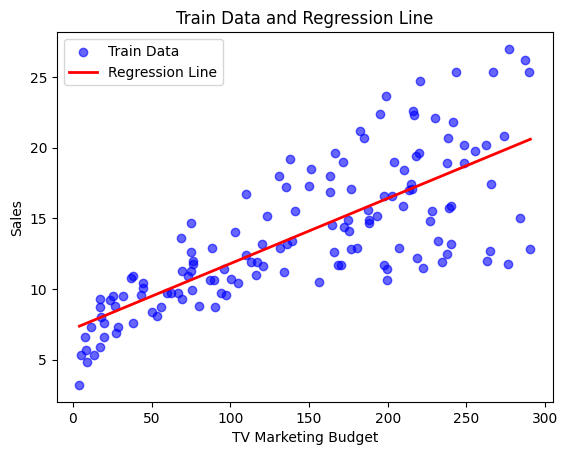

In [14]:
#14.Plot train data and the model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.scatter(x_train, y_train, color='blue', alpha=0.6, label="Train Data")
x_line = np.linspace(x_train['TV'].min(), x_train['TV'].max(), 100)
y_line = lr.intercept_ + lr.coef_[0] * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Train Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()


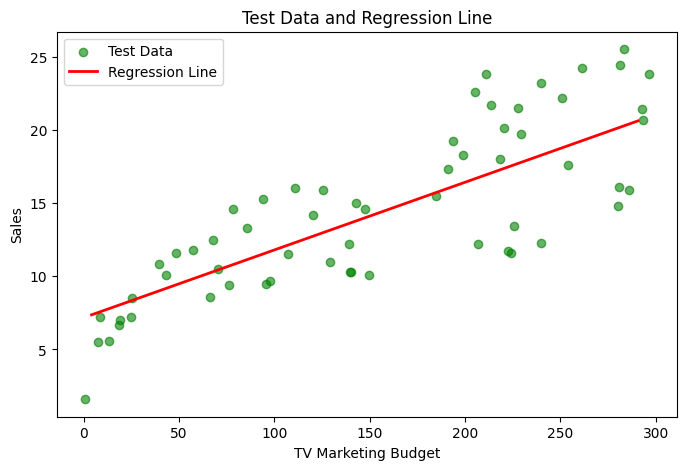

In [15]:
#15.15.Plot test data and the model
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='green', alpha=0.6, label="Test Data")
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Test Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [16]:
#16.Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation (scikit-learn):")
print("Mean Squared Error (MSE):", mse)
print("R Squared:", r2)


Model Evaluation (scikit-learn):
Mean Squared Error (MSE): 10.814313871514974
R Squared: 0.6554029251853306


In [17]:
#17.Calculate and print R Squared and Adjusted R Squared values without any library
y_test_np=y_test.values
n=len(y_test_np)
p=1
ss_total=np.sum((y_test_np-np.mean(y_test_np))**2)
ss_res=np.sum((y_test_np-y_pred)**2)
r_squared_manual=1-(ss_res/ss_total)
adjusted_r_squared=1-(1-r_squared_manual)*(n-1)/(n-p-1)
print("manual R**",r_squared_manual)
print("manual adjuested r **",adjusted_r_squared)

manual R** 0.6554029251853306
manual adjuested r ** 0.6494615963092156
